In [1]:
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from keras.models import Sequential, load_model, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Lambda, Input, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
from keras.losses import mse, binary_crossentropy
from keras import backend as K
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
%matplotlib inline

Using TensorFlow backend.


## Iperparametri

In [2]:
batch_size=128
epochs=5
lr=0.0001

input_dim = 4
hidden_dim = 10
encoding_dim = 3
dropout = 0.2

## Autoencoder

In [3]:
inputLayer = Input(shape=(input_dim,))
encoderLayer = inputLayer
encoderLayer = Dense(hidden_dim, activation="relu")(encoderLayer)
#encoderLayer = Dropout(dropout)(encoderLayer)
encoderLayer = Dense(encoding_dim, activation="relu")(encoderLayer)
decoderLayer = encoderLayer
decoderLayer = Dense(hidden_dim, activation='relu')(decoderLayer)
#decoderLayer = Dropout(dropout)(decoderLayer)
decoderLayer = Dense(input_dim, activation='linear')(decoderLayer)
model = Model(inputs=inputLayer, outputs=decoderLayer)
optimizer = Adam(lr=lr)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['accuracy'])

In [4]:
def generator(data, batch_size):
    counter=0
    while True:
        batch = np.array(data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
        counter += 1
        if(len(batch) > 0): counter = 0
        yield batch, batch

## Training

In [5]:
fileCount = 1
history_loss_train = []
history_acc_train = []
history_loss_test = []
history_acc_test = []
path = './data_train'
for filename in sorted(os.listdir(path)):
    print(str(fileCount) + " - file:" + filename)
    df = pd.read_csv(path+"/"+filename, sep='\t')
    data = df.iloc[:, :].values.astype(np.float32)
    data_train, data_test, _, _ = train_test_split(data, data, test_size=0.3, random_state=42)
    model.fit_generator(
        generator(data_train, batch_size), 
        epochs=epochs, 
        shuffle=False, 
        steps_per_epoch=data.shape[0]/batch_size,
        verbose=0)
    score_train = model.evaluate(data_train, data_train, verbose=0)
    score_test = model.evaluate(data_test, data_test, verbose=0)
    print('Train - Loss:{:.2E} - Acc:{:.0f}%'.format(score_train[0], score_train[1]*100))
    print('Test  - Loss:{:.2E} - Acc:{:.0f}%'.format(score_test[0], score_test[1]*100))
    print("")
    fileCount += 1
    history_loss_train.append(score_train[0])
    history_acc_train.append(score_train[1])
    history_loss_test.append(score_test[0])
    history_acc_test.append(score_test[1])

1 - file:2004.02.12.10.32.39
Train - Loss:4.53E-02 - Acc:55%
Test  - Loss:4.51E-02 - Acc:54%

2 - file:2004.02.12.10.42.39
Train - Loss:3.92E-02 - Acc:59%
Test  - Loss:3.84E-02 - Acc:60%

3 - file:2004.02.12.10.52.39
Train - Loss:3.42E-02 - Acc:61%
Test  - Loss:3.46E-02 - Acc:61%

4 - file:2004.02.12.11.02.39
Train - Loss:3.40E-02 - Acc:61%
Test  - Loss:3.43E-02 - Acc:62%

5 - file:2004.02.12.11.12.39
Train - Loss:3.32E-02 - Acc:62%
Test  - Loss:3.32E-02 - Acc:62%

6 - file:2004.02.12.11.22.39
Train - Loss:3.30E-02 - Acc:61%
Test  - Loss:3.30E-02 - Acc:61%

7 - file:2004.02.12.11.32.39
Train - Loss:3.22E-02 - Acc:62%
Test  - Loss:3.29E-02 - Acc:63%

8 - file:2004.02.12.11.42.39
Train - Loss:3.20E-02 - Acc:61%
Test  - Loss:3.22E-02 - Acc:60%

9 - file:2004.02.12.11.52.39
Train - Loss:3.27E-02 - Acc:62%
Test  - Loss:3.25E-02 - Acc:63%

10 - file:2004.02.12.12.02.39
Train - Loss:3.22E-02 - Acc:62%
Test  - Loss:3.23E-02 - Acc:61%

11 - file:2004.02.12.12.12.39
Train - Loss:3.22E-02 - Acc:6

Train - Loss:3.14E-02 - Acc:61%
Test  - Loss:3.13E-02 - Acc:61%

89 - file:2004.02.13.01.12.39
Train - Loss:3.15E-02 - Acc:63%
Test  - Loss:3.15E-02 - Acc:62%

90 - file:2004.02.13.01.22.39
Train - Loss:3.16E-02 - Acc:60%
Test  - Loss:3.12E-02 - Acc:62%

91 - file:2004.02.13.01.32.39
Train - Loss:3.10E-02 - Acc:62%
Test  - Loss:3.11E-02 - Acc:62%

92 - file:2004.02.13.01.42.39
Train - Loss:3.17E-02 - Acc:61%
Test  - Loss:3.15E-02 - Acc:61%

93 - file:2004.02.13.01.52.39
Train - Loss:3.14E-02 - Acc:60%
Test  - Loss:3.14E-02 - Acc:60%

94 - file:2004.02.13.02.02.39
Train - Loss:3.06E-02 - Acc:63%
Test  - Loss:3.09E-02 - Acc:63%

95 - file:2004.02.13.02.12.39
Train - Loss:3.12E-02 - Acc:61%
Test  - Loss:3.14E-02 - Acc:61%

96 - file:2004.02.13.02.22.39
Train - Loss:3.08E-02 - Acc:62%
Test  - Loss:3.08E-02 - Acc:61%

97 - file:2004.02.13.02.32.39
Train - Loss:3.14E-02 - Acc:63%
Test  - Loss:3.14E-02 - Acc:62%

98 - file:2004.02.13.02.42.39
Train - Loss:3.12E-02 - Acc:60%
Test  - Loss:3.11E

Train - Loss:2.99E-02 - Acc:61%
Test  - Loss:3.01E-02 - Acc:61%

175 - file:2004.02.13.15.32.39
Train - Loss:3.01E-02 - Acc:62%
Test  - Loss:3.01E-02 - Acc:62%

176 - file:2004.02.13.15.42.39
Train - Loss:3.03E-02 - Acc:63%
Test  - Loss:3.07E-02 - Acc:63%

177 - file:2004.02.13.15.52.39
Train - Loss:3.04E-02 - Acc:62%
Test  - Loss:3.07E-02 - Acc:63%

178 - file:2004.02.13.16.02.39
Train - Loss:3.04E-02 - Acc:61%
Test  - Loss:3.08E-02 - Acc:61%

179 - file:2004.02.13.16.12.39
Train - Loss:3.06E-02 - Acc:61%
Test  - Loss:3.03E-02 - Acc:61%

180 - file:2004.02.13.16.22.39
Train - Loss:2.98E-02 - Acc:62%
Test  - Loss:2.99E-02 - Acc:63%

181 - file:2004.02.13.16.32.39
Train - Loss:3.04E-02 - Acc:64%
Test  - Loss:3.09E-02 - Acc:63%

182 - file:2004.02.13.16.42.39
Train - Loss:3.11E-02 - Acc:62%
Test  - Loss:3.07E-02 - Acc:62%

183 - file:2004.02.13.16.52.39
Train - Loss:3.05E-02 - Acc:63%
Test  - Loss:3.01E-02 - Acc:64%

184 - file:2004.02.13.17.02.39
Train - Loss:3.08E-02 - Acc:61%
Test  - 

Train - Loss:3.05E-02 - Acc:62%
Test  - Loss:3.08E-02 - Acc:61%

261 - file:2004.02.14.05.52.39
Train - Loss:3.04E-02 - Acc:63%
Test  - Loss:3.04E-02 - Acc:61%

262 - file:2004.02.14.06.02.39
Train - Loss:3.05E-02 - Acc:61%
Test  - Loss:3.03E-02 - Acc:62%

263 - file:2004.02.14.06.12.39
Train - Loss:3.05E-02 - Acc:62%
Test  - Loss:3.04E-02 - Acc:63%

264 - file:2004.02.14.06.22.39
Train - Loss:3.06E-02 - Acc:61%
Test  - Loss:3.04E-02 - Acc:61%

265 - file:2004.02.14.06.32.39
Train - Loss:3.07E-02 - Acc:63%
Test  - Loss:3.06E-02 - Acc:63%

266 - file:2004.02.14.06.42.39
Train - Loss:3.05E-02 - Acc:62%
Test  - Loss:3.04E-02 - Acc:63%

267 - file:2004.02.14.06.52.39
Train - Loss:3.02E-02 - Acc:62%
Test  - Loss:3.01E-02 - Acc:62%

268 - file:2004.02.14.07.02.39
Train - Loss:3.06E-02 - Acc:62%
Test  - Loss:3.07E-02 - Acc:63%

269 - file:2004.02.14.07.12.39
Train - Loss:3.09E-02 - Acc:61%
Test  - Loss:3.12E-02 - Acc:60%

270 - file:2004.02.14.07.22.39
Train - Loss:3.06E-02 - Acc:63%
Test  - 

Train - Loss:3.10E-02 - Acc:62%
Test  - Loss:3.11E-02 - Acc:63%

347 - file:2004.02.14.20.12.39
Train - Loss:3.12E-02 - Acc:61%
Test  - Loss:3.12E-02 - Acc:62%

348 - file:2004.02.14.20.22.39
Train - Loss:3.03E-02 - Acc:63%
Test  - Loss:3.05E-02 - Acc:61%

349 - file:2004.02.14.20.32.39
Train - Loss:3.01E-02 - Acc:63%
Test  - Loss:3.00E-02 - Acc:63%

350 - file:2004.02.14.20.42.39
Train - Loss:2.95E-02 - Acc:61%
Test  - Loss:2.95E-02 - Acc:62%

351 - file:2004.02.14.20.52.39
Train - Loss:2.95E-02 - Acc:62%
Test  - Loss:2.99E-02 - Acc:61%

352 - file:2004.02.14.21.02.39
Train - Loss:3.04E-02 - Acc:62%
Test  - Loss:3.03E-02 - Acc:64%

353 - file:2004.02.14.21.12.39
Train - Loss:3.08E-02 - Acc:62%
Test  - Loss:3.04E-02 - Acc:62%

354 - file:2004.02.14.21.22.39
Train - Loss:3.02E-02 - Acc:62%
Test  - Loss:3.03E-02 - Acc:62%

355 - file:2004.02.14.21.32.39
Train - Loss:3.04E-02 - Acc:63%
Test  - Loss:3.03E-02 - Acc:64%

356 - file:2004.02.14.21.42.39
Train - Loss:2.96E-02 - Acc:62%
Test  - 

Train - Loss:2.98E-02 - Acc:63%
Test  - Loss:3.03E-02 - Acc:62%

433 - file:2004.02.15.10.32.39
Train - Loss:2.97E-02 - Acc:62%
Test  - Loss:2.96E-02 - Acc:63%

434 - file:2004.02.15.10.42.39
Train - Loss:2.94E-02 - Acc:63%
Test  - Loss:2.96E-02 - Acc:63%

435 - file:2004.02.15.10.52.39
Train - Loss:2.99E-02 - Acc:63%
Test  - Loss:3.04E-02 - Acc:62%

436 - file:2004.02.15.11.02.39
Train - Loss:2.98E-02 - Acc:61%
Test  - Loss:2.99E-02 - Acc:62%

437 - file:2004.02.15.11.12.39
Train - Loss:3.08E-02 - Acc:61%
Test  - Loss:3.07E-02 - Acc:62%

438 - file:2004.02.15.11.22.39
Train - Loss:3.03E-02 - Acc:63%
Test  - Loss:3.00E-02 - Acc:63%

439 - file:2004.02.15.11.32.39
Train - Loss:2.97E-02 - Acc:61%
Test  - Loss:2.96E-02 - Acc:62%

440 - file:2004.02.15.11.42.39
Train - Loss:3.02E-02 - Acc:61%
Test  - Loss:3.01E-02 - Acc:61%

441 - file:2004.02.15.11.52.39
Train - Loss:3.05E-02 - Acc:62%
Test  - Loss:3.05E-02 - Acc:61%

442 - file:2004.02.15.12.02.39
Train - Loss:2.97E-02 - Acc:61%
Test  - 

## Crash Test

In [6]:
#crash
fileCount = 1
path = './data_crash'
for filename in sorted(os.listdir(path)):
    print(str(fileCount) + " - file:" + filename)
    df = pd.read_csv(path+"/"+filename, sep='\t')
    data = df.iloc[:, :].values.astype(np.float32)
    score = model.evaluate(data, data, verbose=0)
    print('Crash  - Loss:{:.2E} - Acc:{:.0f}%'.format(score[0], score[1]*100))
    print("")
    fileCount += 1
    history_loss_test.append(score[0])
    history_acc_test.append(score[1])

1 - file:2004.02.16.00.02.39
Crash  - Loss:3.02E-02 - Acc:61%

2 - file:2004.02.16.00.12.39
Crash  - Loss:3.00E-02 - Acc:61%

3 - file:2004.02.16.00.22.39
Crash  - Loss:3.02E-02 - Acc:61%

4 - file:2004.02.16.00.32.39
Crash  - Loss:3.00E-02 - Acc:61%

5 - file:2004.02.16.00.42.39
Crash  - Loss:3.02E-02 - Acc:61%

6 - file:2004.02.16.00.52.39
Crash  - Loss:2.99E-02 - Acc:61%

7 - file:2004.02.16.01.02.39
Crash  - Loss:2.99E-02 - Acc:61%

8 - file:2004.02.16.01.12.39
Crash  - Loss:3.04E-02 - Acc:61%

9 - file:2004.02.16.01.22.39
Crash  - Loss:2.98E-02 - Acc:61%

10 - file:2004.02.16.01.32.39
Crash  - Loss:3.00E-02 - Acc:61%

11 - file:2004.02.16.01.42.39
Crash  - Loss:3.09E-02 - Acc:61%

12 - file:2004.02.16.01.52.39
Crash  - Loss:3.00E-02 - Acc:61%

13 - file:2004.02.16.02.02.39
Crash  - Loss:3.03E-02 - Acc:62%

14 - file:2004.02.16.02.12.39
Crash  - Loss:3.00E-02 - Acc:61%

15 - file:2004.02.16.02.22.39
Crash  - Loss:3.02E-02 - Acc:62%

16 - file:2004.02.16.02.32.39
Crash  - Loss:3.02E

Crash  - Loss:3.03E-02 - Acc:62%

130 - file:2004.02.16.21.32.39
Crash  - Loss:3.02E-02 - Acc:63%

131 - file:2004.02.16.21.42.39
Crash  - Loss:3.01E-02 - Acc:63%

132 - file:2004.02.16.21.52.39
Crash  - Loss:3.02E-02 - Acc:63%

133 - file:2004.02.16.22.02.39
Crash  - Loss:3.03E-02 - Acc:63%

134 - file:2004.02.16.22.12.39
Crash  - Loss:3.06E-02 - Acc:63%

135 - file:2004.02.16.22.22.39
Crash  - Loss:3.10E-02 - Acc:63%

136 - file:2004.02.16.22.32.39
Crash  - Loss:3.06E-02 - Acc:63%

137 - file:2004.02.16.22.42.39
Crash  - Loss:3.09E-02 - Acc:64%

138 - file:2004.02.16.22.52.39
Crash  - Loss:3.07E-02 - Acc:63%

139 - file:2004.02.16.23.02.39
Crash  - Loss:3.02E-02 - Acc:63%

140 - file:2004.02.16.23.12.39
Crash  - Loss:3.05E-02 - Acc:63%

141 - file:2004.02.16.23.22.39
Crash  - Loss:3.08E-02 - Acc:63%

142 - file:2004.02.16.23.32.39
Crash  - Loss:3.04E-02 - Acc:63%

143 - file:2004.02.16.23.42.39
Crash  - Loss:3.09E-02 - Acc:63%

144 - file:2004.02.16.23.52.39
Crash  - Loss:3.05E-02 - 

Crash  - Loss:3.25E-02 - Acc:63%

257 - file:2004.02.17.18.42.39
Crash  - Loss:3.25E-02 - Acc:63%

258 - file:2004.02.17.18.52.39
Crash  - Loss:3.16E-02 - Acc:63%

259 - file:2004.02.17.19.02.39
Crash  - Loss:3.18E-02 - Acc:63%

260 - file:2004.02.17.19.12.39
Crash  - Loss:3.16E-02 - Acc:62%

261 - file:2004.02.17.19.22.39
Crash  - Loss:3.17E-02 - Acc:63%

262 - file:2004.02.17.19.32.39
Crash  - Loss:3.14E-02 - Acc:63%

263 - file:2004.02.17.19.42.39
Crash  - Loss:3.19E-02 - Acc:63%

264 - file:2004.02.17.19.52.39
Crash  - Loss:3.18E-02 - Acc:63%

265 - file:2004.02.17.20.02.39
Crash  - Loss:3.24E-02 - Acc:63%

266 - file:2004.02.17.20.12.39
Crash  - Loss:3.18E-02 - Acc:63%

267 - file:2004.02.17.20.22.39
Crash  - Loss:3.21E-02 - Acc:63%

268 - file:2004.02.17.20.32.39
Crash  - Loss:3.18E-02 - Acc:63%

269 - file:2004.02.17.20.42.39
Crash  - Loss:3.14E-02 - Acc:63%

270 - file:2004.02.17.20.52.39
Crash  - Loss:3.14E-02 - Acc:63%

271 - file:2004.02.17.21.02.39
Crash  - Loss:3.14E-02 - 

Crash  - Loss:3.57E-02 - Acc:64%

384 - file:2004.02.18.15.52.39
Crash  - Loss:3.57E-02 - Acc:64%

385 - file:2004.02.18.16.02.39
Crash  - Loss:3.51E-02 - Acc:63%

386 - file:2004.02.18.16.12.39
Crash  - Loss:3.57E-02 - Acc:64%

387 - file:2004.02.18.16.22.39
Crash  - Loss:3.54E-02 - Acc:63%

388 - file:2004.02.18.16.32.39
Crash  - Loss:3.55E-02 - Acc:63%

389 - file:2004.02.18.16.42.39
Crash  - Loss:3.60E-02 - Acc:64%

390 - file:2004.02.18.16.52.39
Crash  - Loss:3.60E-02 - Acc:64%

391 - file:2004.02.18.17.02.39
Crash  - Loss:3.73E-02 - Acc:65%

392 - file:2004.02.18.17.12.39
Crash  - Loss:3.73E-02 - Acc:65%

393 - file:2004.02.18.17.22.39
Crash  - Loss:3.83E-02 - Acc:66%

394 - file:2004.02.18.17.32.39
Crash  - Loss:3.96E-02 - Acc:66%

395 - file:2004.02.18.17.42.39
Crash  - Loss:4.02E-02 - Acc:66%

396 - file:2004.02.18.17.52.39
Crash  - Loss:4.08E-02 - Acc:66%

397 - file:2004.02.18.18.02.39
Crash  - Loss:4.02E-02 - Acc:66%

398 - file:2004.02.18.18.12.39
Crash  - Loss:3.95E-02 - 

## Visualizzazione

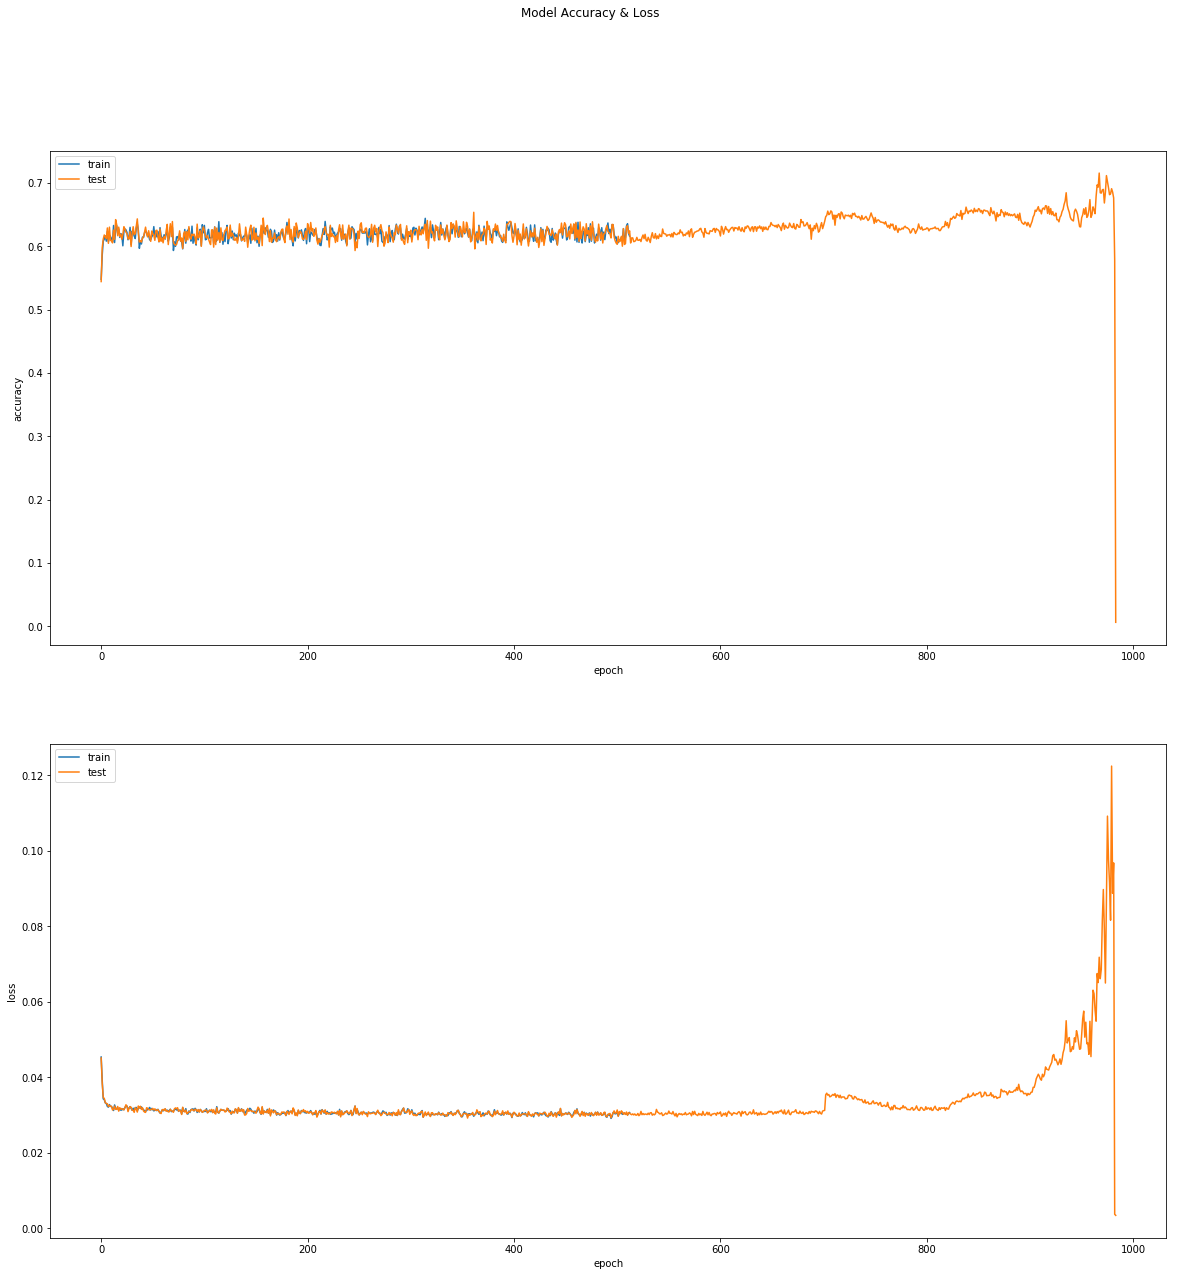

In [7]:
plt.rcParams["figure.figsize"] = (20,20)
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model Accuracy & Loss')
ax1.plot(history_acc_train)
ax1.plot(history_acc_test)
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_loss_train)
ax2.plot(history_loss_test)
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()